<a href="https://colab.research.google.com/github/prdurgam-edu/Reinforcement-Learning/blob/main/Bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import random
import random as rn
import matplotlib.pyplot as plt
import seaborn as sns
import math

class bandit:
  def __init__(self,mu,sigma):
    self.mu=mu
    self.sigma=sigma
  def pull(self):
    return(random.normal(loc=self.mu, scale=self.sigma))

In [ ]:
def decide_greedy(bandit_1_reward,bandit_2_reward,bandit_3_reward):
  if bandit_1_reward>=bandit_2_reward and bandit_1_reward>=bandit_3_reward:
    return(bandit_1)
  if bandit_2_reward>=bandit_1_reward and bandit_2_reward>=bandit_3_reward:
    return(bandit_2)
  return(bandit_3)

def e_greedy(bandit_1,bandit_2,bandit_3,n_iterations,epsilon):
  greedy_action=bandit_1
  non_greedy_action=[bandit_1,bandit_2,bandit_3]
  bandit_1_reward=0
  bandit_2_reward=0
  bandit_3_reward=0
  bandit_1_n=0
  bandit_2_n=0
  bandit_3_n=0
  avg_reward=0
  n=0
  avg_rewards=[]
  for i in range(n_iterations):
    non_greedy_action=[bandit_1,bandit_2,bandit_3]
    num=random.sample()
    if num<(1-epsilon)+(epsilon/3):
      if greedy_action==bandit_1:
        reward=bandit_1.pull()
        bandit_1_n+=1
        bandit_1_reward=bandit_1_reward*(1-1/(bandit_1_n))+reward*(1/bandit_1_n)
        n+=1
        avg_reward=avg_reward*(1-1/n)+reward*(1/n)
      elif greedy_action==bandit_2:
        reward=bandit_2.pull()
        bandit_2_n+=1
        bandit_2_reward=bandit_2_reward*(1-1/(bandit_2_n))+reward*(1/bandit_2_n)
        n+=1
        avg_reward=avg_reward*(1-1/n)+reward*(1/n)
      elif greedy_action==bandit_3:
        reward=bandit_3.pull()
        bandit_3_n+=1
        bandit_3_reward=bandit_3_reward*(1-1/(bandit_3_n))+reward*(1/bandit_3_n)
        n+=1
        avg_reward=avg_reward*(1-1/n)+reward*(1/n)
    else:
      non_greedy_action.pop(non_greedy_action.index(greedy_action))
      non_greedy_action=random.choice(non_greedy_action)
      if non_greedy_action==bandit_1:
        reward=bandit_1.pull()
        bandit_1_n+=1
        bandit_1_reward=bandit_1_reward*(1-1/(bandit_1_n))+reward*(1/bandit_1_n)
        n+=1
        avg_reward=avg_reward*(1-1/n)+reward*(1/n)
      elif non_greedy_action==bandit_2:
        reward=bandit_2.pull()
        bandit_2_n+=1
        bandit_2_reward=bandit_2_reward*(1-1/(bandit_2_n))+reward*(1/bandit_2_n)
        n+=1
        avg_reward=avg_reward*(1-1/n)+reward*(1/n)
      elif non_greedy_action==bandit_3:
        reward=bandit_3.pull()
        bandit_3_n+=1
        bandit_3_reward=bandit_3_reward*(1-1/(bandit_3_n))+reward*(1/bandit_3_n)
        n+=1
        avg_reward=avg_reward*(1-1/n)+reward*(1/n)
    avg_rewards.append(avg_reward)
    greedy_action=decide_greedy(bandit_1_reward,bandit_2_reward,bandit_3_reward)
    t=0
    if greedy_action==bandit_1:
      t='bandit_1'
    elif greedy_action==bandit_2:
      t='bandit_2'
    elif greedy_action==bandit_3:
      t='bandit_3'
  return(t,avg_rewards)

bandit_1=bandit(1,1)
bandit_2=bandit(2,1)
bandit_3=bandit(3,1)
print(e_greedy(bandit_1,bandit_2,bandit_3,1000,0.2))

('bandit_3', [0.45277003161572715, 0.6827880039099663, 1.0966029037555547, 0.943545606375574, 1.229064699486153, 1.6281140339690536, 1.5141056495930179, 1.4468525282794094, 1.3453464144698277, 1.2445714394779384, 1.2789039766973285, 1.23832787890102, 1.279221741510713, 1.27292406290766, 1.3062572935152228, 1.3650583259107507, 1.4532455455708686, 1.5091835230423118, 1.5188602631508639, 1.6046710312122296, 1.6787278068608464, 1.7227170607980602, 1.7874664708862422, 1.7860542520672147, 1.8527629647338437, 1.8732970915025227, 1.823084990971873, 1.7475022364002977, 1.7213565786925598, 1.6604457164136597, 1.6797398720796388, 1.6867073099472139, 1.7066683771207445, 1.6617810720785242, 1.6598117162563937, 1.6824355031289078, 1.6939977409009348, 1.7144185138906443, 1.7584032846076838, 1.7679573999410183, 1.8272785655666335, 1.8456247199209068, 1.8988370273394959, 1.9209046707324604, 1.9577664348284904, 1.9791067694344873, 1.9907378202525352, 1.9994139144507017, 2.019359202690474, 1.993184037494

<Axes: >

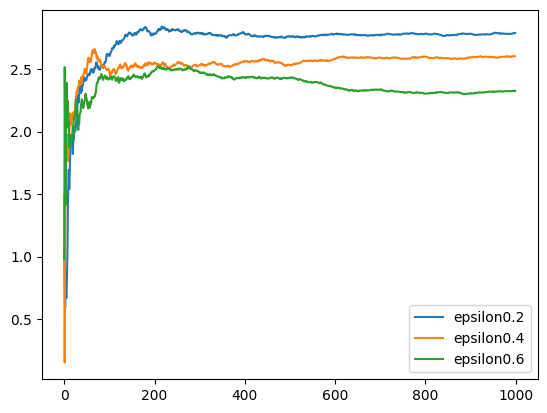

In [ ]:
bandits,rewards1=e_greedy(bandit_1,bandit_2,bandit_3,1000,0.2)
bandits,rewards2=e_greedy(bandit_1,bandit_2,bandit_3,1000,0.4)
bandits,rewards3=e_greedy(bandit_1,bandit_2,bandit_3,1000,0.6)
sns.lineplot(rewards1,label='epsilon0.2')
sns.lineplot(rewards2,label='epsilon0.4')
sns.lineplot(rewards3,label='epsilon0.6')

In [ ]:
def decide_greedy(bandit_1_reward,bandit_2_reward,bandit_3_reward):
  if bandit_1_reward>=bandit_2_reward and bandit_1_reward>=bandit_3_reward:
    return(bandit_1)
  if bandit_2_reward>=bandit_1_reward and bandit_2_reward>=bandit_3_reward:
    return(bandit_2)
  return(bandit_3)

def e_o_greedy(bandit_1,bandit_2,bandit_3,n_iterations,epsilon):
  greedy_action=bandit_1
  non_greedy_action=[bandit_1,bandit_2,bandit_3]
  bandit_1_reward=10
  bandit_2_reward=10
  bandit_3_reward=10
  bandit_1_n=0
  bandit_2_n=0
  bandit_3_n=0
  avg_reward=0
  n=0
  avg_rewards=[]
  for i in range(n_iterations):
    non_greedy_action=[bandit_1,bandit_2,bandit_3]
    num=random.sample()
    if num<(1-epsilon)+(epsilon/3):
      if greedy_action==bandit_1:
        reward=bandit_1.pull()
        bandit_1_n+=1
        bandit_1_reward=bandit_1_reward*(1-1/(bandit_1_n))+reward*(1/bandit_1_n)
        n+=1
        avg_reward=avg_reward*(1-1/n)+reward*(1/n)
      elif greedy_action==bandit_2:
        reward=bandit_2.pull()
        bandit_2_n+=1
        bandit_2_reward=bandit_2_reward*(1-1/(bandit_2_n))+reward*(1/bandit_2_n)
        n+=1
        avg_reward=avg_reward*(1-1/n)+reward*(1/n)
      elif greedy_action==bandit_3:
        reward=bandit_3.pull()
        bandit_3_n+=1
        bandit_3_reward=bandit_3_reward*(1-1/(bandit_3_n))+reward*(1/bandit_3_n)
        n+=1
        avg_reward=avg_reward*(1-1/n)+reward*(1/n)
    else:
      non_greedy_action.pop(non_greedy_action.index(greedy_action))
      non_greedy_action=random.choice(non_greedy_action)
      if non_greedy_action==bandit_1:
        reward=bandit_1.pull()
        bandit_1_n+=1
        bandit_1_reward=bandit_1_reward*(1-1/(bandit_1_n))+reward*(1/bandit_1_n)
        n+=1
        avg_reward=avg_reward*(1-1/n)+reward*(1/n)
      elif non_greedy_action==bandit_2:
        reward=bandit_2.pull()
        bandit_2_n+=1
        bandit_2_reward=bandit_2_reward*(1-1/(bandit_2_n))+reward*(1/bandit_2_n)
        n+=1
        avg_reward=avg_reward*(1-1/n)+reward*(1/n)
      elif non_greedy_action==bandit_3:
        reward=bandit_3.pull()
        bandit_3_n+=1
        bandit_3_reward=bandit_3_reward*(1-1/(bandit_3_n))+reward*(1/bandit_3_n)
        n+=1
        avg_reward=avg_reward*(1-1/n)+reward*(1/n)
    avg_rewards.append(avg_reward)
    greedy_action=decide_greedy(bandit_1_reward,bandit_2_reward,bandit_3_reward)
    t=0
    if greedy_action==bandit_1:
      t='bandit_1'
    elif greedy_action==bandit_2:
      t='bandit_2'
    elif greedy_action==bandit_3:
      t='bandit_3'
  return(t,avg_rewards)

bandit_1=bandit(1,1)
bandit_2=bandit(2,1)
bandit_3=bandit(3,1)
print(e_o_greedy(bandit_1,bandit_2,bandit_3,1000,0.2))

('bandit_3', [2.1108015522049075, 1.8314154502374744, 2.537108454659675, 2.2773109620080567, 2.0934650446020746, 2.252082203834806, 2.2407836975865405, 2.318457817425155, 2.4341568971650984, 2.296570531163287, 2.154740805564668, 2.3580050558814696, 2.1950754226820637, 2.402119461498851, 2.3805101082616997, 2.44060872494651, 2.5254557675973035, 2.3860998598488026, 2.45058218757254, 2.409970707754934, 2.3524004126874507, 2.339763175607837, 2.4076760860999133, 2.4623407457584543, 2.532423280172616, 2.437917959008971, 2.483661404241319, 2.5103779452587385, 2.508189514105186, 2.5249814461214446, 2.539815585308249, 2.5322300398760094, 2.5561038898297044, 2.5981597948205386, 2.617967345228245, 2.62605710182813, 2.5732518514066203, 2.6208536452327102, 2.601997682614226, 2.6154304204713625, 2.6217557212264424, 2.622952012800687, 2.634914504186491, 2.631847997423328, 2.657833508882171, 2.6261553852004864, 2.6233794200494875, 2.6138662994598376, 2.607660051907541, 2.627349321437909, 2.62219019408

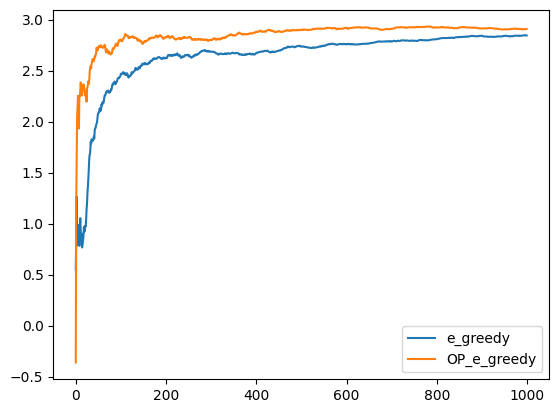

In [ ]:
bandits,rewards1=e_greedy(bandit_1,bandit_2,bandit_3,1000,0.1)
bandits,rewards2=e_o_greedy(bandit_1,bandit_2,bandit_3,1000,0.1)

sns.lineplot(rewards1,label='e_greedy')
sns.lineplot(rewards2,label='OP_e_greedy')
plt.legend()

In [ ]:
def ucb_greedy(bandit_1,bandit_2,bandit_3,n_iterations,epsilon):
  greedy_action=bandit_1
  non_greedy_action=[bandit_1,bandit_2,bandit_3]
  bandit_1_reward=10
  bandit_2_reward=10
  bandit_3_reward=10
  bandit_1_n=0
  bandit_2_n=0
  bandit_3_n=0
  avg_reward=0
  n=0
  avg_rewards=[]
  for i in range(n_iterations):
    non_greedy_action=[bandit_1,bandit_2,bandit_3]
    num=random.sample()
    if num<(1-epsilon)+(epsilon/3):
      if greedy_action==bandit_1:
        reward=bandit_1.pull()
        bandit_1_n+=1
        bandit_1_reward=bandit_1_reward*(1-1/(bandit_1_n))+reward*(1/bandit_1_n)+(math.log2(n+1)/(bandit_1_n))**0.5
        n+=1
        avg_reward=avg_reward*(1-1/n)+reward*(1/n)
      elif greedy_action==bandit_2:
        reward=bandit_2.pull()
        bandit_2_n+=1
        bandit_2_reward=bandit_2_reward*(1-1/(bandit_2_n))+reward*(1/bandit_2_n)+(math.log2(n+1)/(bandit_2_n))**0.5
        n+=1
        avg_reward=avg_reward*(1-1/n)+reward*(1/n)
      elif greedy_action==bandit_3:
        reward=bandit_3.pull()
        bandit_3_n+=1
        bandit_3_reward=bandit_3_reward*(1-1/(bandit_3_n))+reward*(1/bandit_3_n)+(math.log2(n+1)/(bandit_3_n))**0.5
        n+=1
        avg_reward=avg_reward*(1-1/n)+reward*(1/n)
    else:
      non_greedy_action.pop(non_greedy_action.index(greedy_action))
      non_greedy_action=random.choice(non_greedy_action)
      if non_greedy_action==bandit_1:
        reward=bandit_1.pull()
        bandit_1_n+=1
        bandit_1_reward=bandit_1_reward*(1-1/(bandit_1_n))+reward*(1/bandit_1_n)
        n+=1
        avg_reward=avg_reward*(1-1/n)+reward*(1/n)
      elif non_greedy_action==bandit_2:
        reward=bandit_2.pull()
        bandit_2_n+=1
        bandit_2_reward=bandit_2_reward*(1-1/(bandit_2_n))+reward*(1/bandit_2_n)
        n+=1
        avg_reward=avg_reward*(1-1/n)+reward*(1/n)
      elif non_greedy_action==bandit_3:
        reward=bandit_3.pull()
        bandit_3_n+=1
        bandit_3_reward=bandit_3_reward*(1-1/(bandit_3_n))+reward*(1/bandit_3_n)
        n+=1
        avg_reward=avg_reward*(1-1/n)+reward*(1/n)
    avg_rewards.append(avg_reward)
    greedy_action=decide_greedy(bandit_1_reward,bandit_2_reward,bandit_3_reward)
    t=0
    if greedy_action==bandit_1:
      t='bandit_1'
    elif greedy_action==bandit_2:
      t='bandit_2'
    elif greedy_action==bandit_3:
      t='bandit_3'
  return(t,avg_rewards)

bandit_1=bandit(1,1)
bandit_2=bandit(2,1)
bandit_3=bandit(3,1)

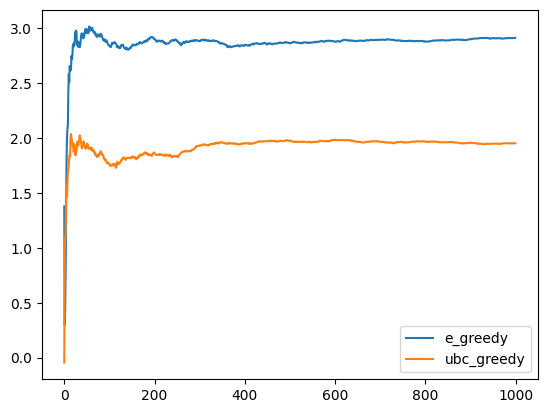

In [ ]:
bandits,rewards1=e_greedy(bandit_1,bandit_2,bandit_3,1000,0.1)
bandits,rewards2=ucb_greedy(bandit_1,bandit_2,bandit_3,1000,0)

sns.lineplot(rewards1,label='e_greedy')
sns.lineplot(rewards2,label='ubc_greedy')
plt.legend()